In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# 1
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


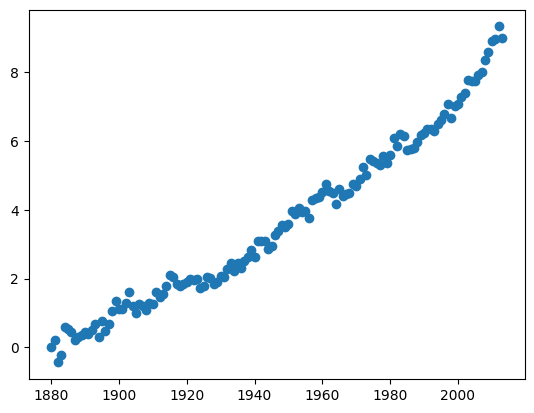

In [ ]:
# 2
fig, ax = plt.subplots()

ax.scatter(data = df, x = 'Year', y = 'CSIRO Adjusted Sea Level')
plt.show()

In [ ]:
# 3
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [13]:
m, b = res.slope, res.intercept

func = lambda x: m*x + b
m, b

(0.06304458401213482, -119.06594196773983)

In [6]:
[func(x) for x in range(1880, 2051)][:5]

[-0.5421240249263661,
 -0.4790794409142336,
 -0.41603485690210107,
 -0.35299027288996854,
 -0.2899456888778218]

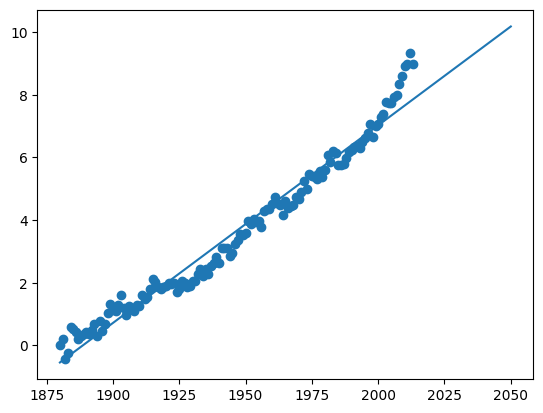

In [7]:
plt.scatter(data = df, x = 'Year', y = 'CSIRO Adjusted Sea Level')
plt.plot(range(1880,2051), [func(x) for x in range(1880, 2051)])
plt.show()

In [14]:
# 4
new_df = df[['Year','CSIRO Adjusted Sea Level']].set_index('Year').loc[2000:,:].copy()
res2 = linregress(new_df.index, new_df['CSIRO Adjusted Sea Level'])
m2, b2 = res2.slope, res2.intercept

func2 = lambda x: m2*x + b2
new_df

,CSIRO Adjusted Sea Level
Year,
2000,7.062992
2001,7.287402
2002,7.381890
2003,7.759843
2004,7.740157
2005,7.744094
2006,7.917323
2007,7.996063
2008,8.350394


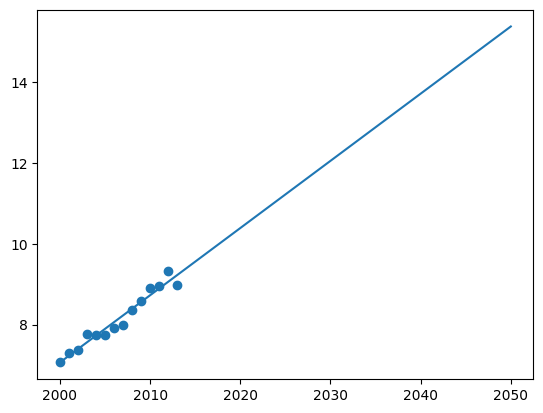

In [15]:
plt.scatter(data = new_df, x = new_df.index, y = 'CSIRO Adjusted Sea Level')
plt.plot(range(2000,2051), [func2(x) for x in range(2000, 2051)])
plt.show()

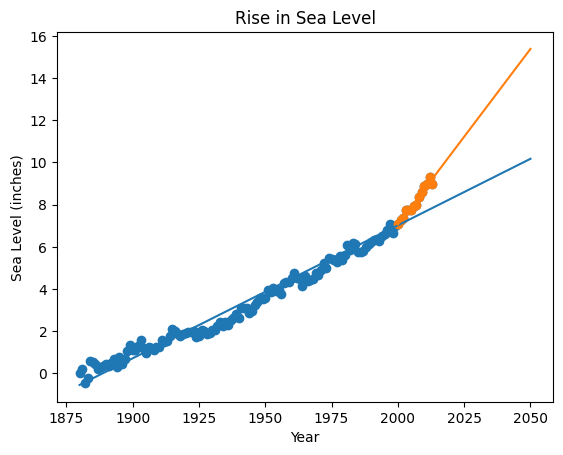

In [16]:
# 5
plt.scatter(data = df, x = 'Year', y = 'CSIRO Adjusted Sea Level')
plt.plot(range(1880,2051), [func(x) for x in range(1880, 2051)])

plt.scatter(data = new_df, x = new_df.index, y = 'CSIRO Adjusted Sea Level')
plt.plot(range(2000,2051), [func2(x) for x in range(2000, 2051)])

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()